<a href="https://colab.research.google.com/github/ppaunovski/ml_labs/blob/master/ML_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
letter_recognition = fetch_ucirepo(id=59)

# data (as pandas dataframes)
X = letter_recognition.data.features
y = letter_recognition.data.targets

# metadata
print(letter_recognition.metadata)

# variable information
print(letter_recognition.variables)


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [ ]:
X

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
y

,lettr
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
y = encoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y

array([19,  8,  3, ..., 19, 18,  0])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<Axes: >

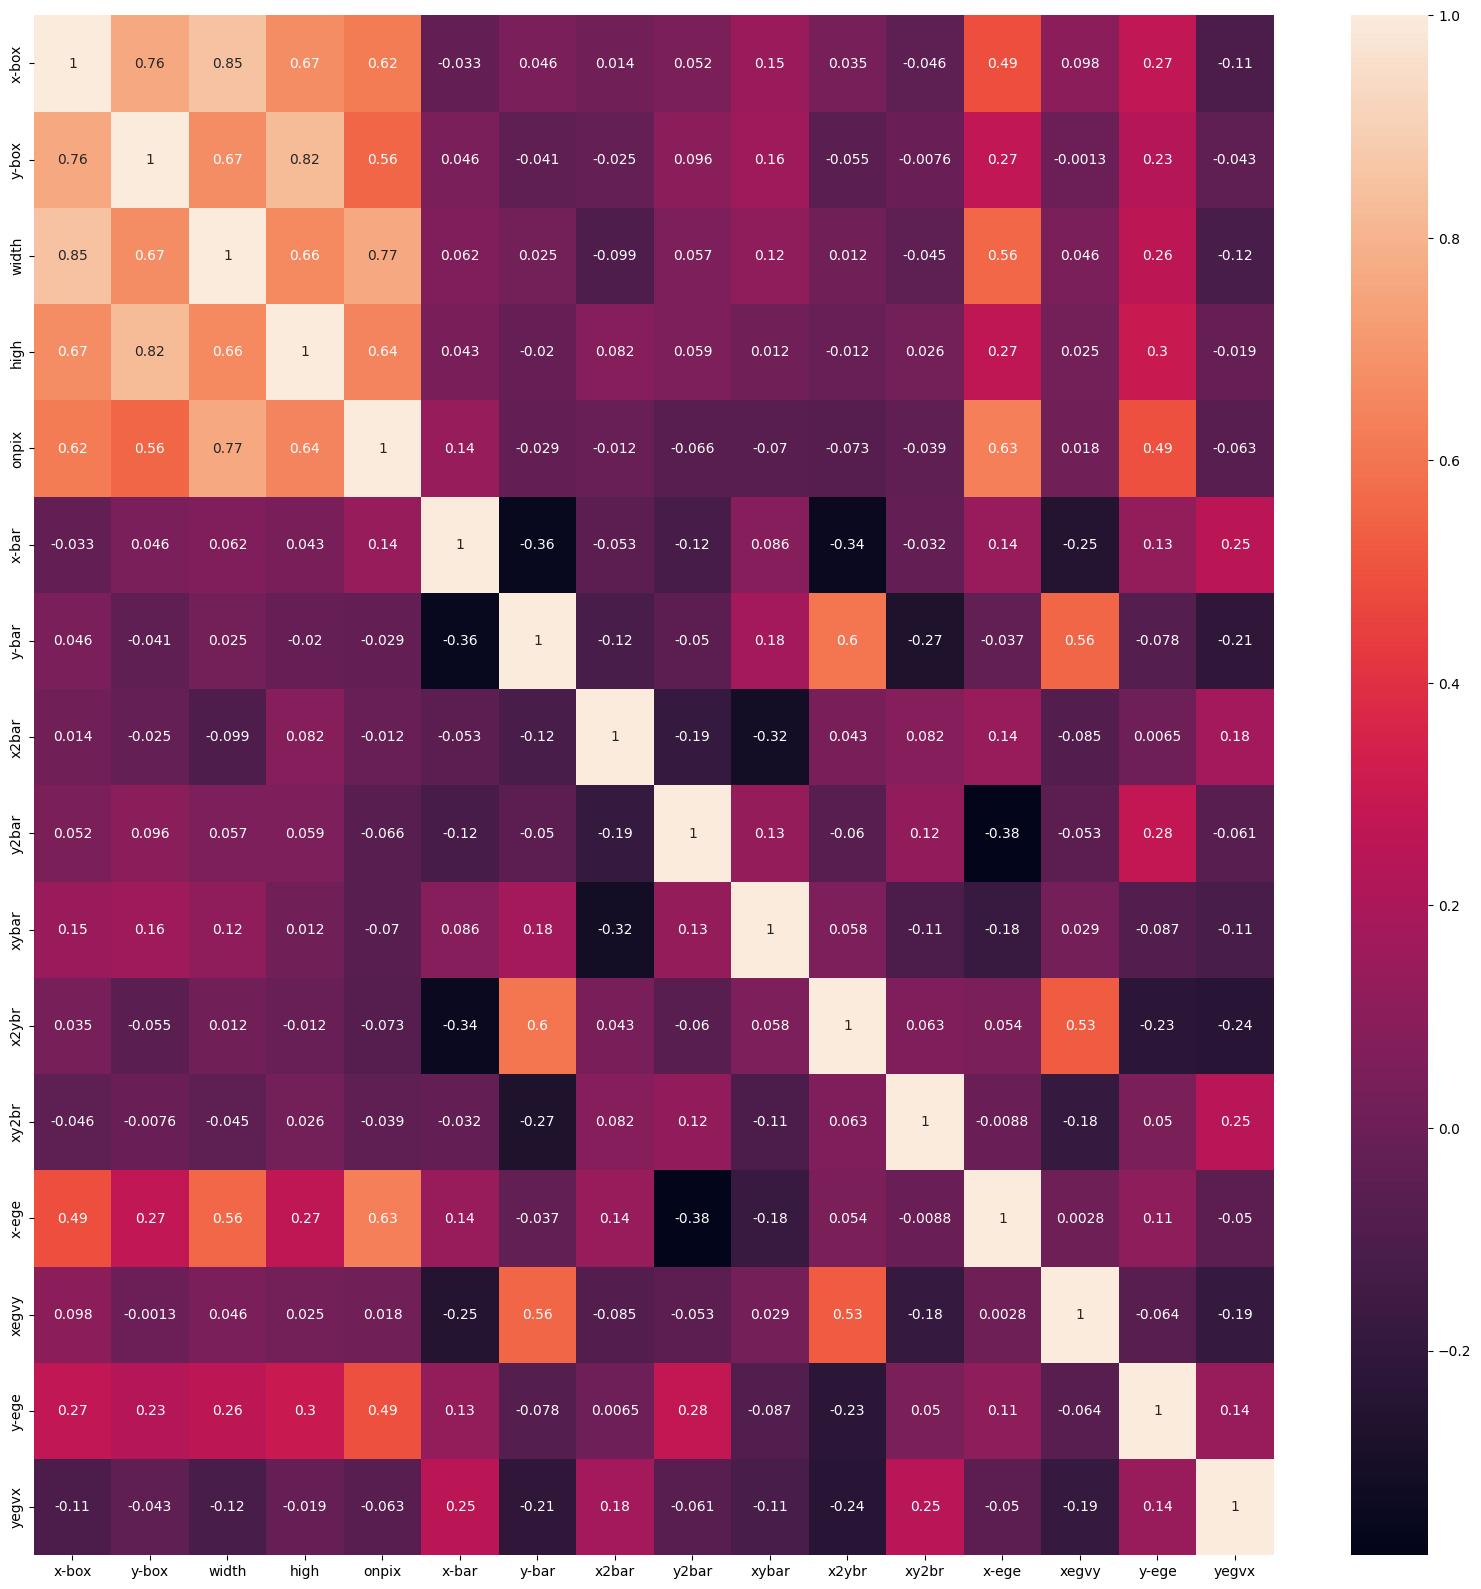

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), annot=True)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
gaussianNB = GaussianNB()
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()

In [ ]:
gaussianNB.fit(X_train, y_train)
prediction_nb = gaussianNB.predict(X_test)

LDA.fit(X_train, y_train)
prediction_lda = LDA.predict(X_test)

QDA.fit(X_train, y_train)
prediction_qda = QDA.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix_display(y_true, y_pred, model):
  cm = confusion_matrix(y_true, y_pred)

  # Plot confusion matrix as heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()
  print(f'{model}\nAccuracy: {accuracy_score(y_true, y_pred)}')

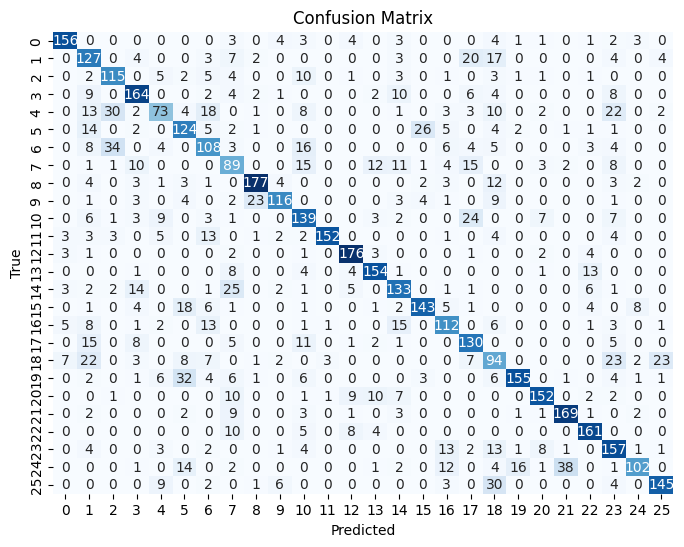

LDA
Accuracy: 0.7046


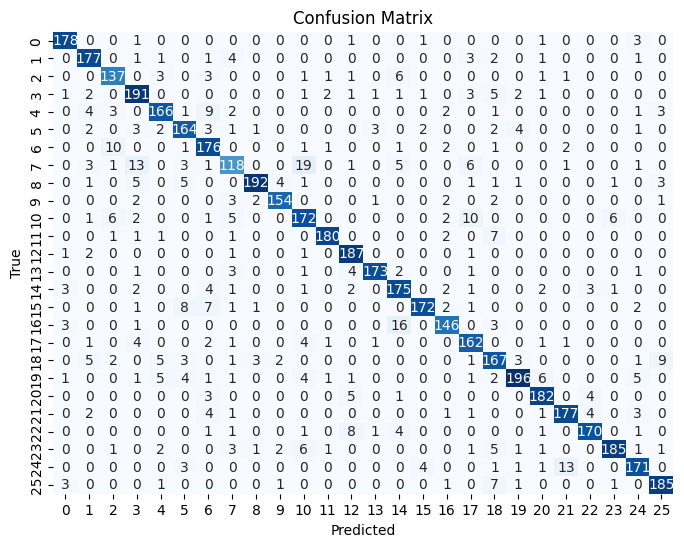

QDA
Accuracy: 0.8906


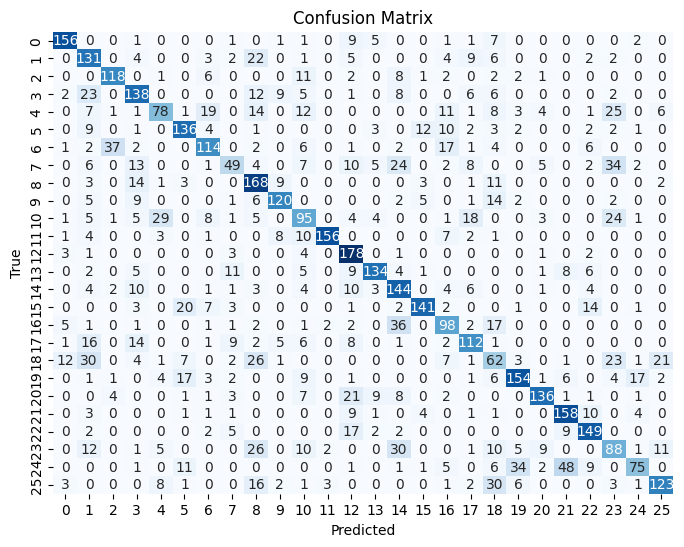

NB
Accuracy: 0.6422


In [ ]:

confusion_matrix_display(y_test, prediction_lda, 'LDA')
confusion_matrix_display(y_test, prediction_qda, 'QDA')
confusion_matrix_display(y_test, prediction_nb, 'NB')

Best k: 1


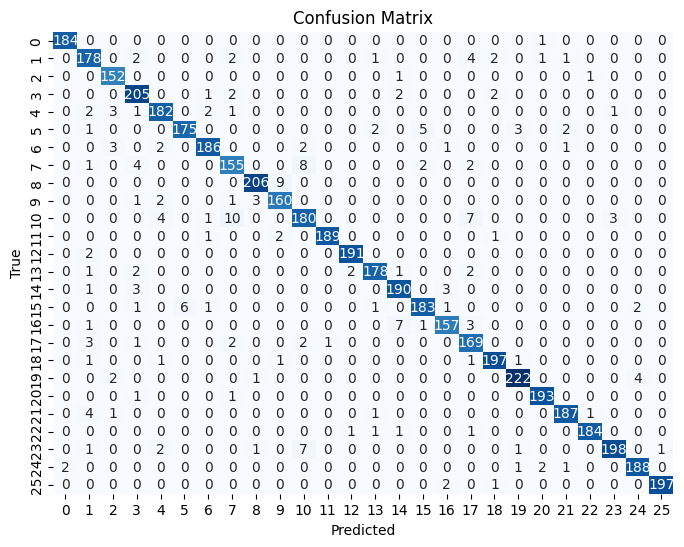

KNN
Accuracy: 0.9572


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
knn = KNeighborsClassifier()

cv=5

param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

print("Best k:", grid_search.best_params_['n_neighbors'])

best_knn = grid_search.best_estimator_
prediction_knn = best_knn.predict(X_test)
confusion_matrix_display(y_test, prediction_knn, 'KNN')


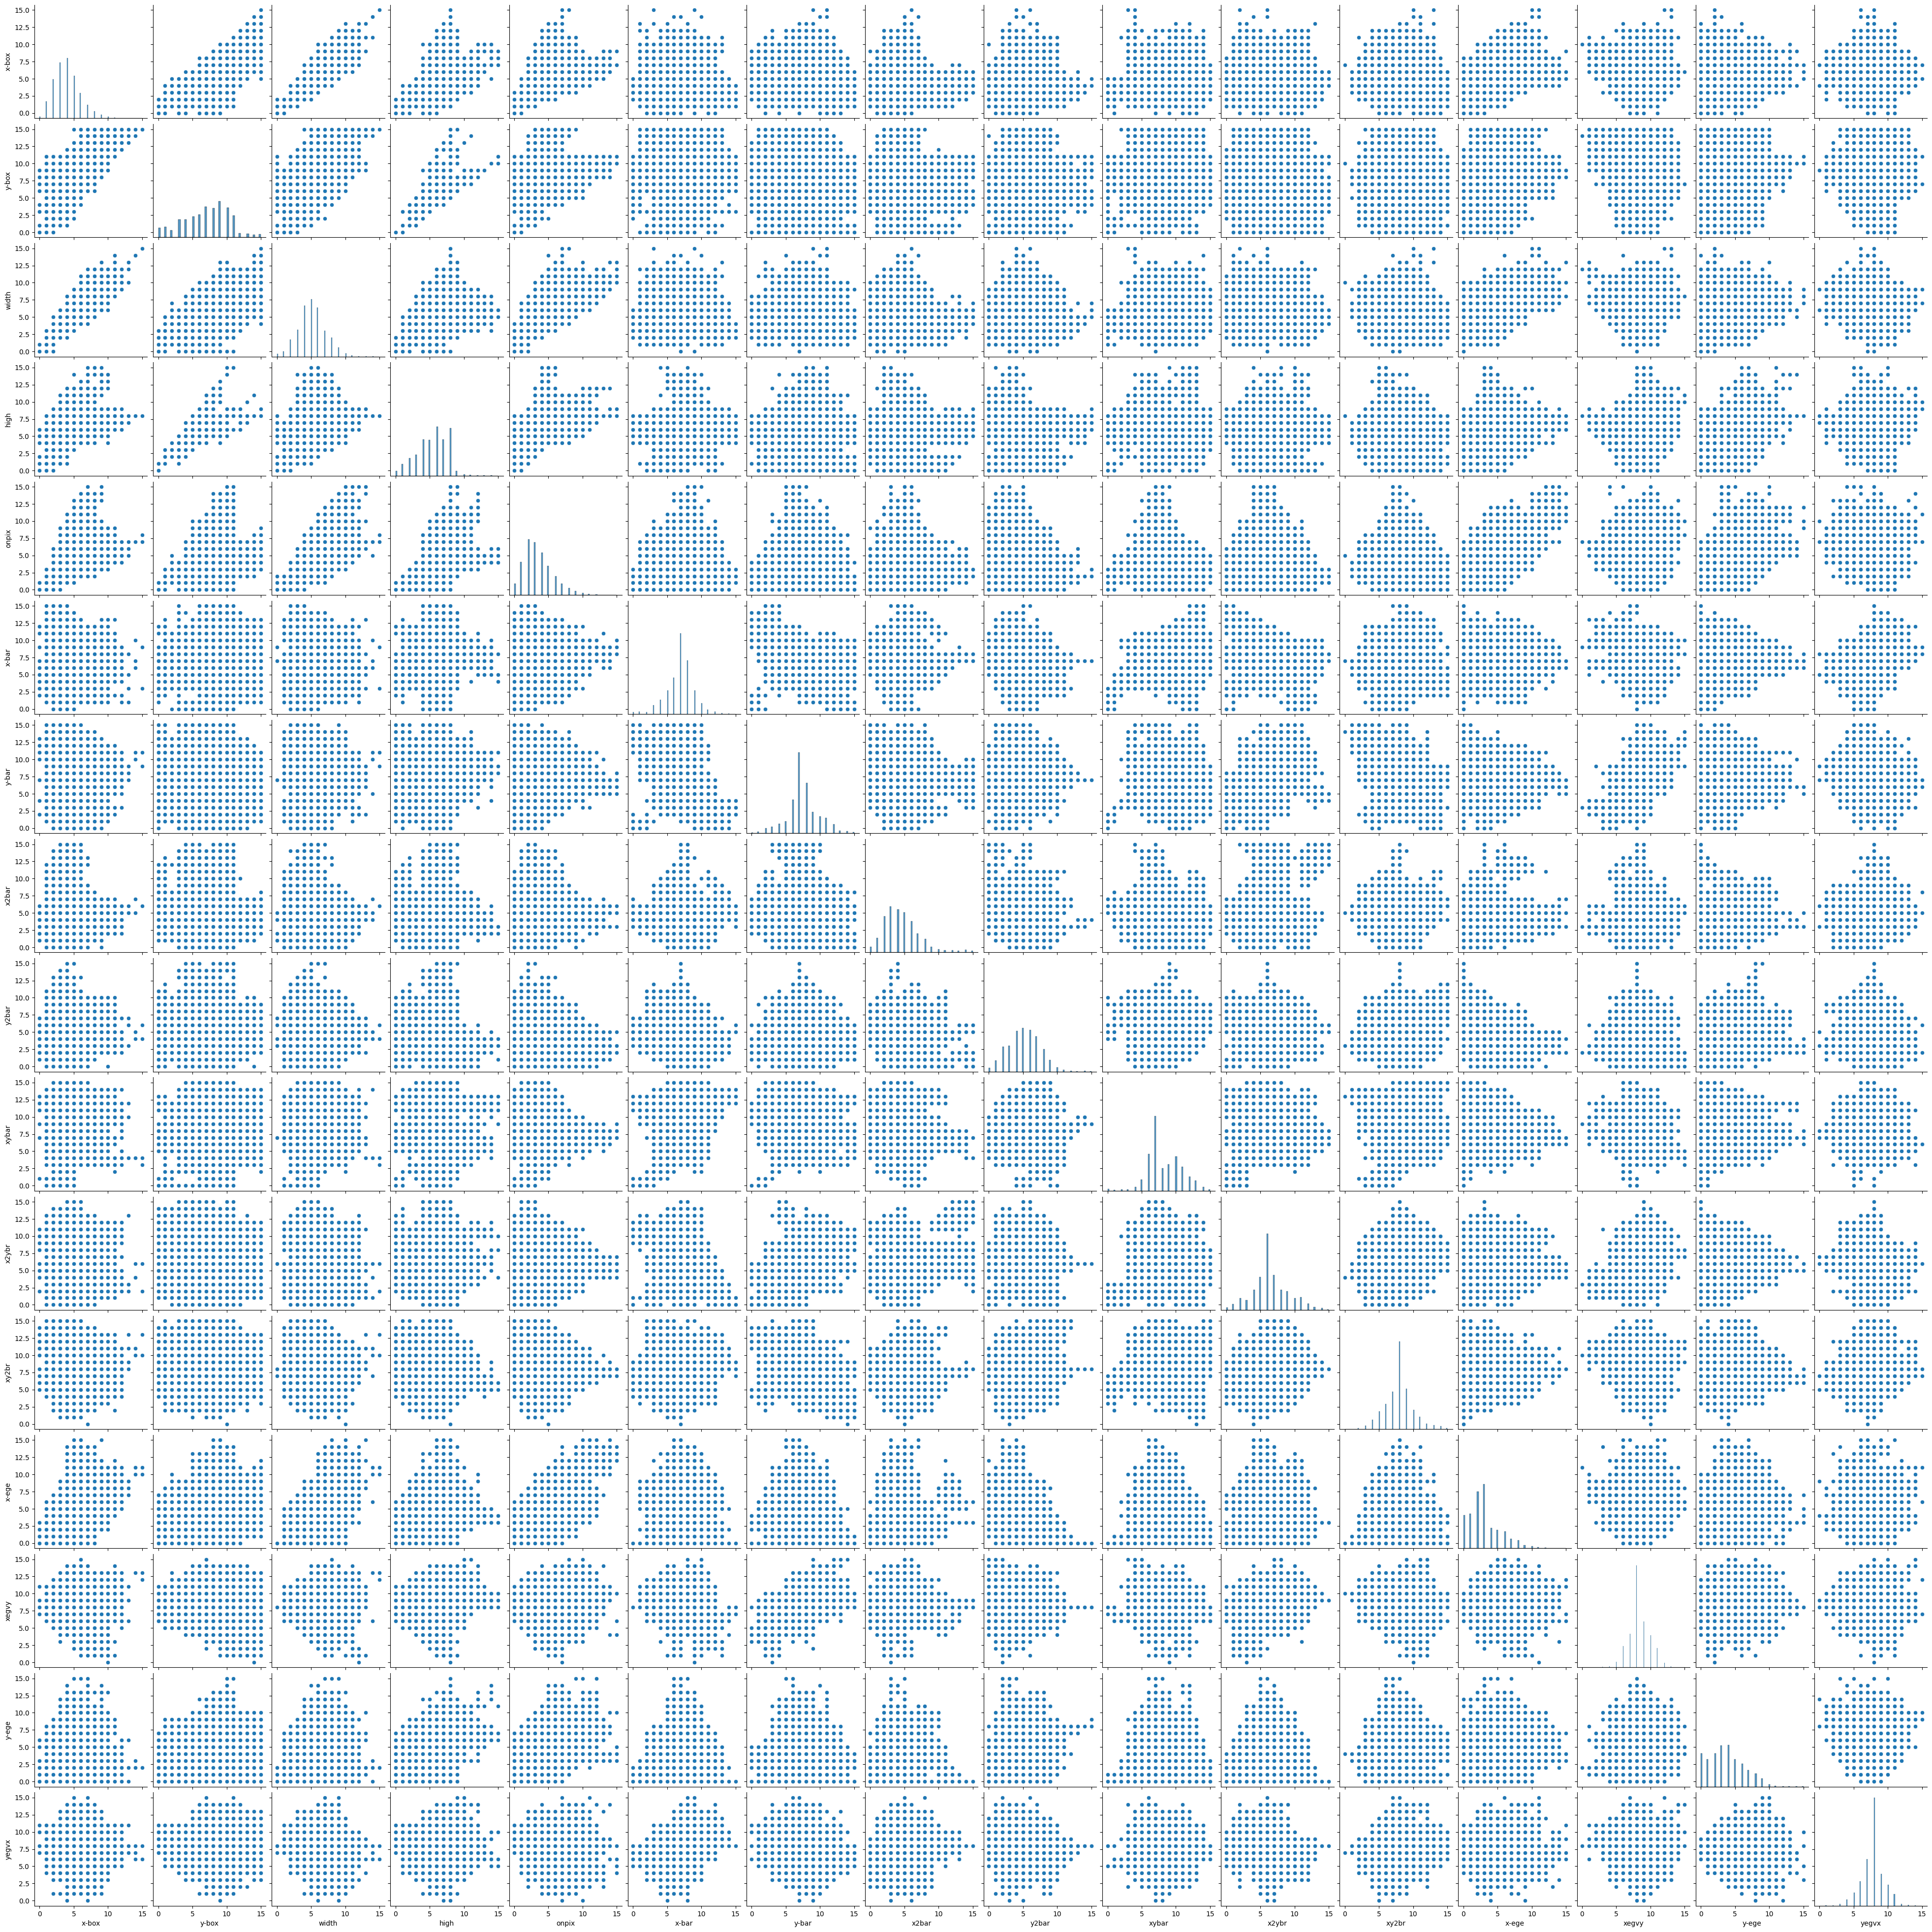

In [ ]:
sns.pairplot(X)

Best gamma: auto


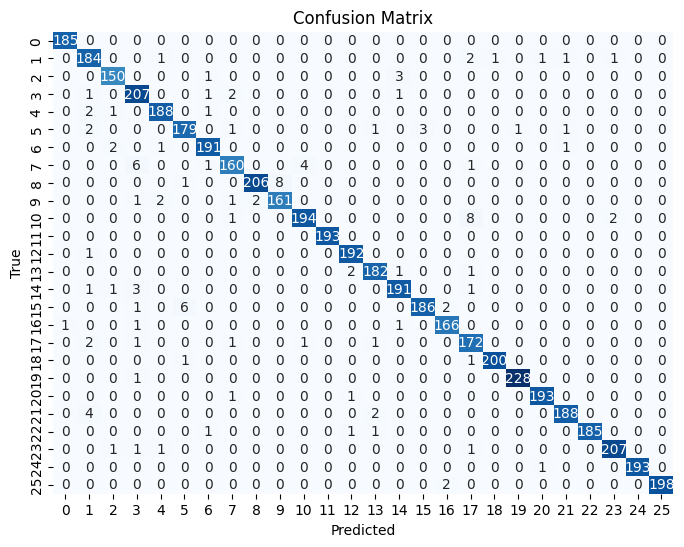

SVM
Accuracy: 0.9758


In [ ]:
param_grid = {'gamma': [0.1, 0.01, 0.001, 0.0001, 'scale', 'auto']}

svm_rbf = SVC(kernel='rbf')

grid_search = GridSearchCV(svm_rbf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best gamma:", grid_search.best_params_['gamma'])

best_svm_rbf = grid_search.best_estimator_

prediction_svm = best_svm_rbf.predict(X_test)
confusion_matrix_display(y_test, prediction_svm, 'SVM')